#   Car Price Prediction Project 

# Problem Statement :-
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.
# Business Goal :-
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy, etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Reading and Understanding the Data

In [2]:
cars = pd.read_csv('CAR_PRICE.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Step 2 : Data Cleaning and Preparation

In [6]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)
    
replace_name('alfa-romero','alfaromero')
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfaromero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
#Checking for duplicates
cars.loc[cars.duplicated()]


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
#selection of numerical and categorical colmuns
num_cols = cars.select_dtypes(exclude = 'object')
cat_cols = cars.select_dtypes(include = 'object')

In [11]:
# numerical columns
num_cols.columns


Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [12]:
# categorical columns 
cat_cols.columns


Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [13]:
# Checking missing values 
cars.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Hence there is no outliers in the dataset.

# Explanatory Data Analysis

# Step 3: Visualizing the data

### Univariate Analysis

3.1 Boxplot for outliers dection of the numerical variables

Text(0.5, 1.0, 'Boxplot of compressionratio')

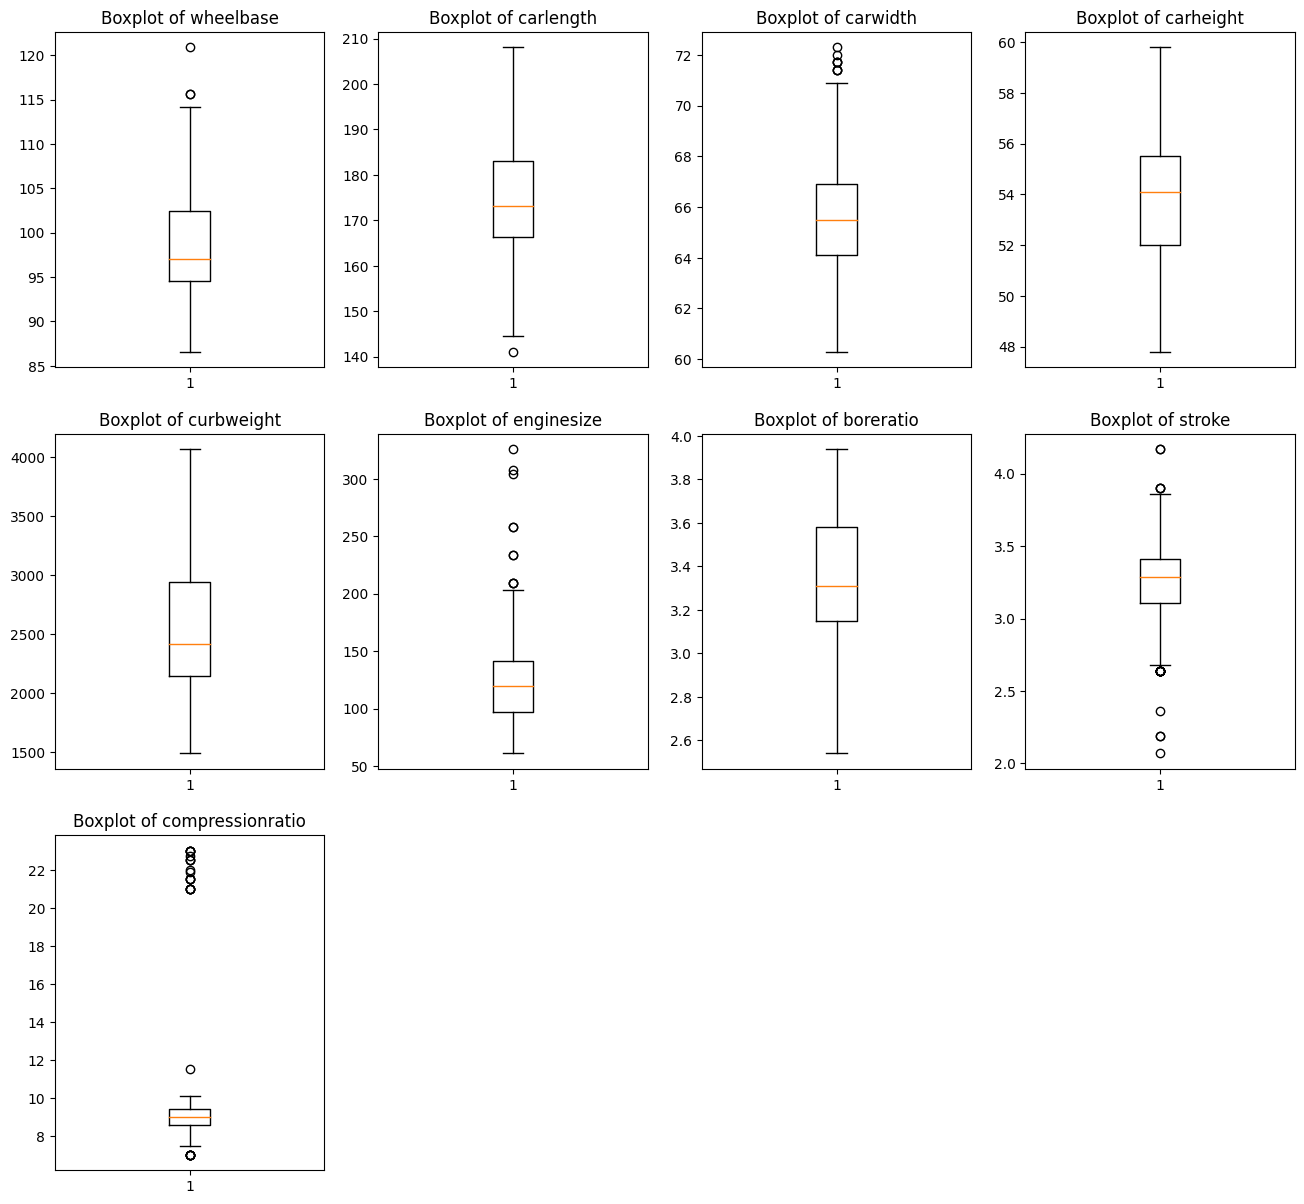

In [14]:
#outlier detection
plt.figure(figsize = (16, 20))
plt.subplot(441)
plt.boxplot(cars["wheelbase"])
plt.title("Boxplot of wheelbase")
plt.subplot(442)
plt.boxplot(cars["carlength"])
plt.title("Boxplot of carlength")
plt.subplot(443)
plt.boxplot(cars["carwidth"])
plt.title("Boxplot of carwidth")
plt.subplot(444)
plt.boxplot(cars["carheight"])
plt.title("Boxplot of carheight")
plt.subplot(445)
plt.boxplot(cars["curbweight"])
plt.title("Boxplot of curbweight")
plt.subplot(446)
plt.boxplot(cars["enginesize"])
plt.title("Boxplot of enginesize")
plt.subplot(447)
plt.boxplot(cars["boreratio"])
plt.title("Boxplot of boreratio")
plt.subplot(448)
plt.boxplot(cars["stroke"])
plt.title("Boxplot of stroke")
plt.subplot(449)
plt.boxplot(cars["compressionratio"])
plt.title("Boxplot of compressionratio")

Text(0.5, 1.0, 'Boxplot of price')

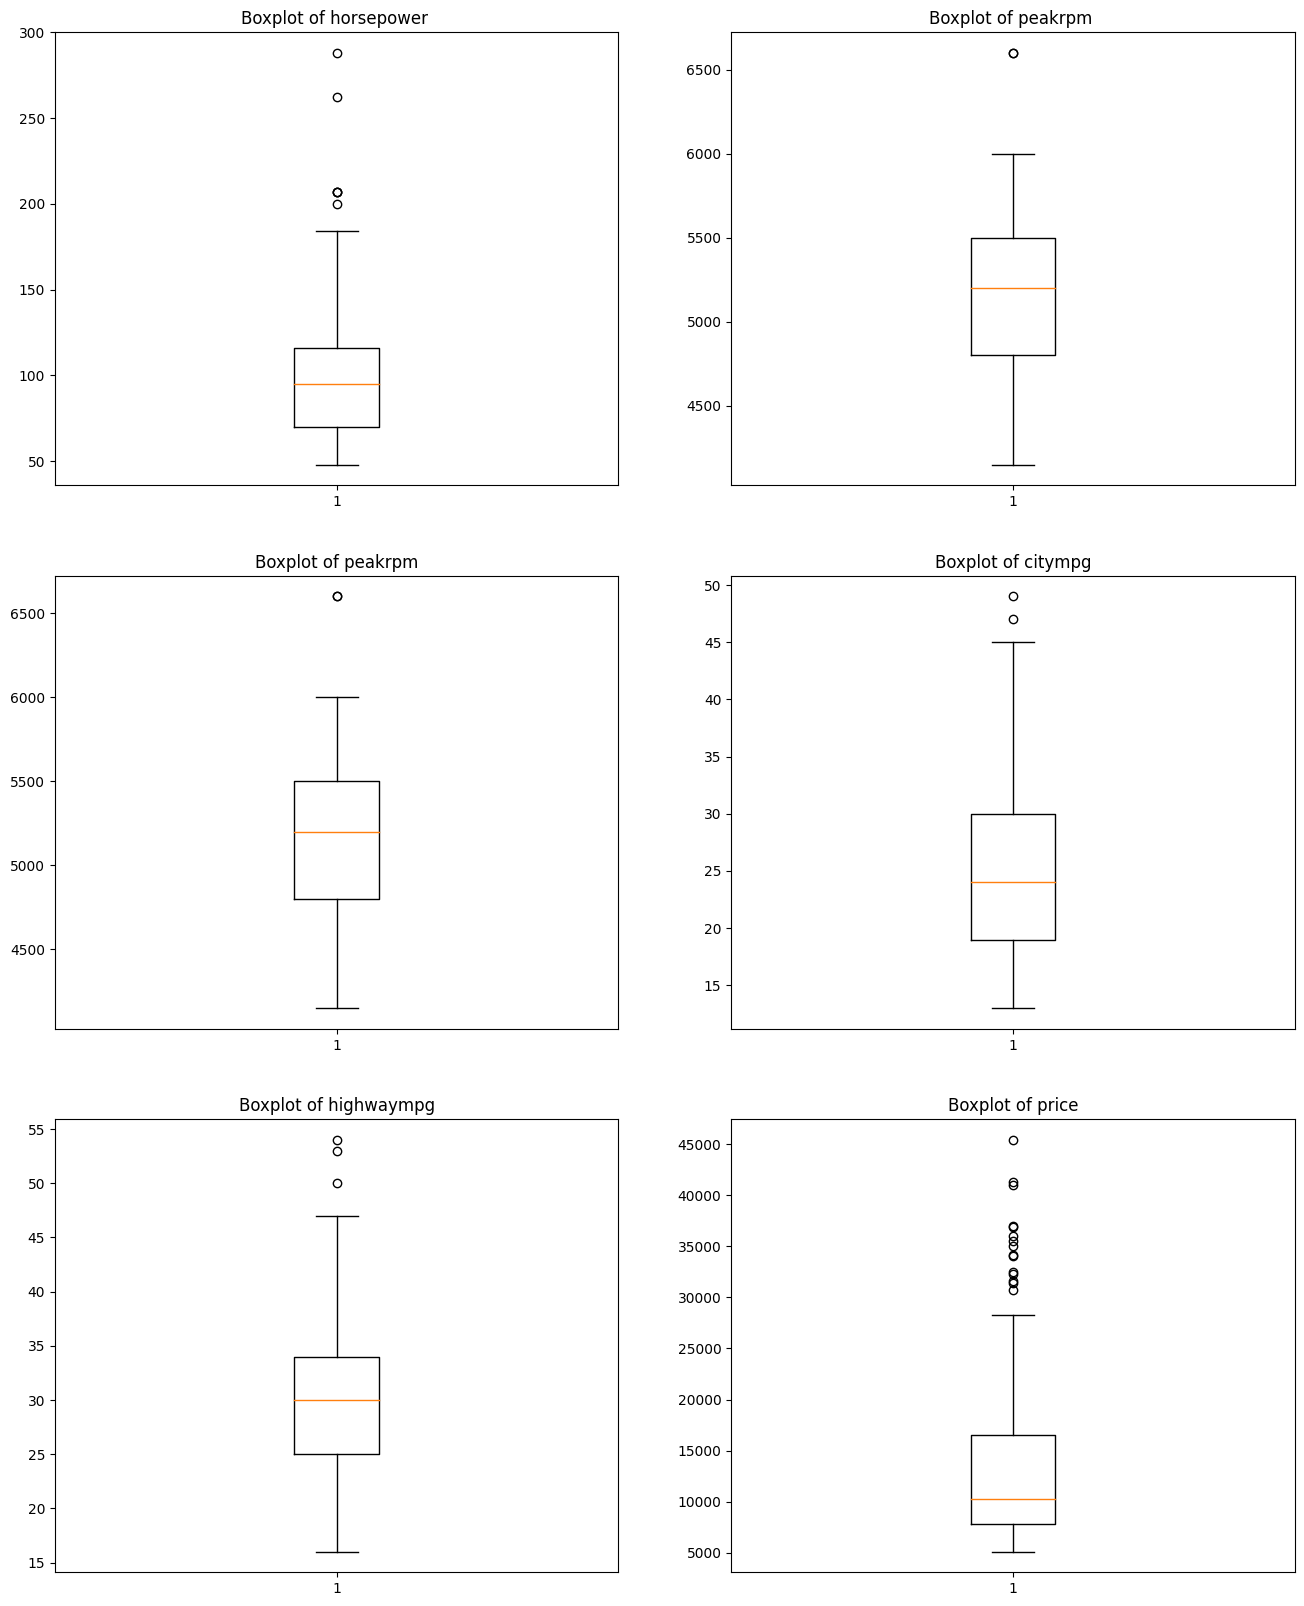

In [15]:
#outlier detection
plt.figure(figsize = (16, 20))
plt.subplot(321)
plt.boxplot(cars["horsepower"])
plt.title("Boxplot of horsepower ")
plt.subplot(322)
plt.boxplot(cars["peakrpm"])
plt.title("Boxplot of peakrpm ")
plt.subplot(323)
plt.boxplot(cars["peakrpm"])
plt.title("Boxplot of peakrpm")
plt.subplot(324)
plt.boxplot(cars["citympg"])
plt.title("Boxplot of citympg")
plt.subplot(325)
plt.boxplot(cars["highwaympg"])
plt.title("Boxplot of highwaympg")
plt.subplot(326)
plt.boxplot(cars["price"])
plt.title("Boxplot of price")

3.2  Visulation of categorical variables

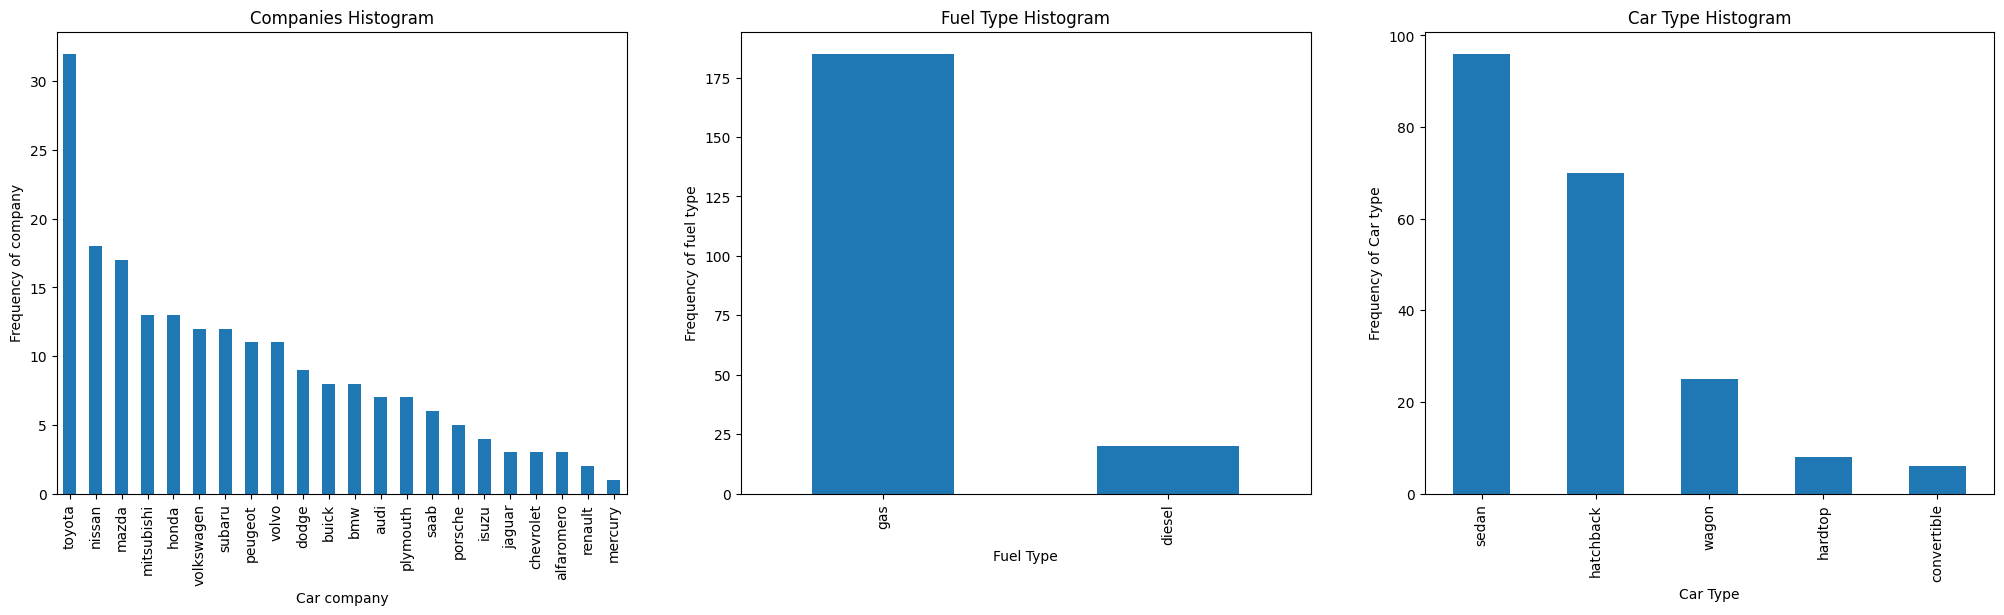

In [16]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

1.Toyota seemed to be favored car company.

 2.Number of gas fueled cars are more than diesel.
 
 3.sedan is the top car type prefered.

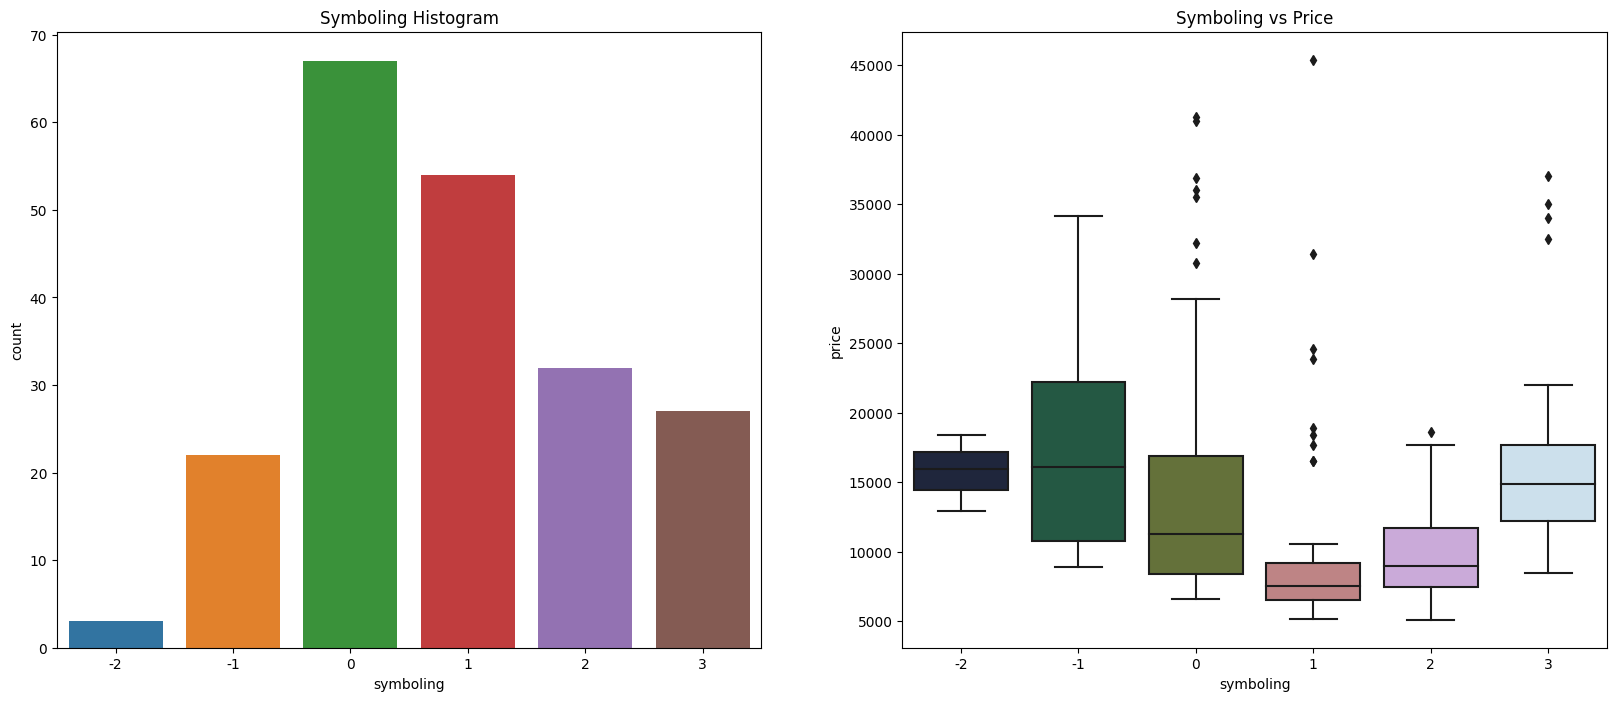

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling) 
plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

1.It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

2.The cars with -1 symboling seems to be high priced.


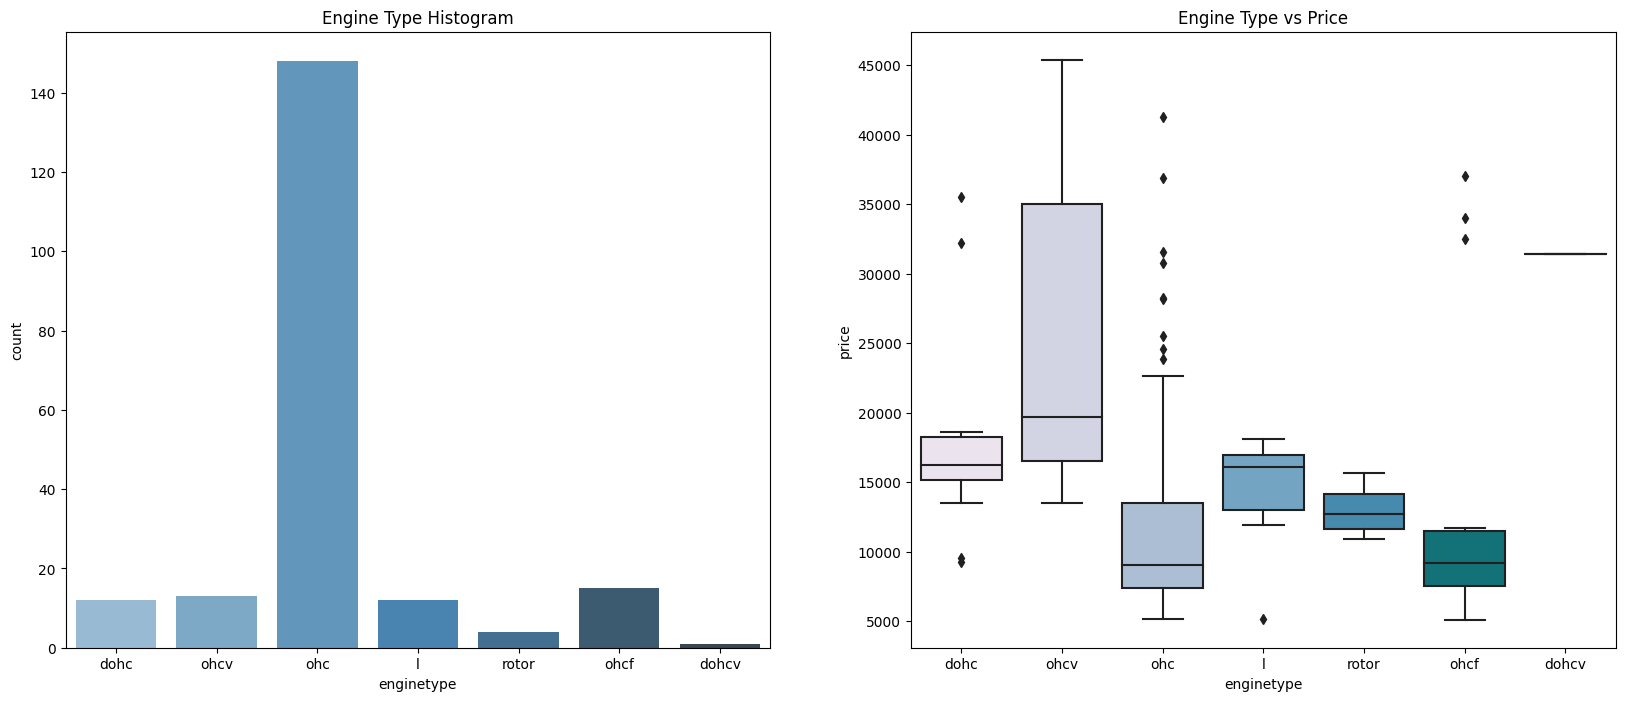

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x=cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

1.ohc Engine type seems to be most favored type.

2.ohcv has the highest price range.

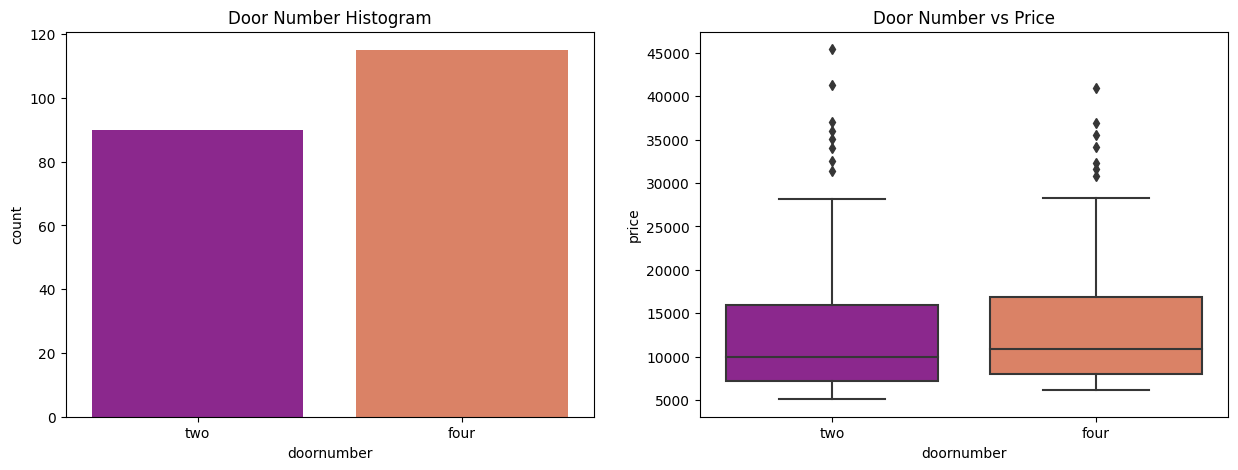

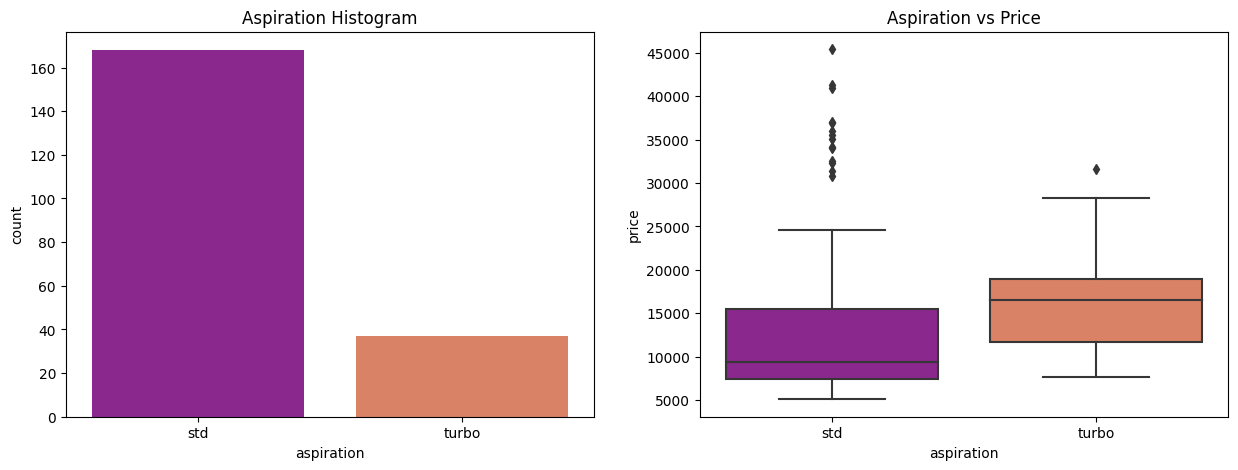

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(x=cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(x=cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()


1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

2.It seems aspiration with turbo have higher price range than the std

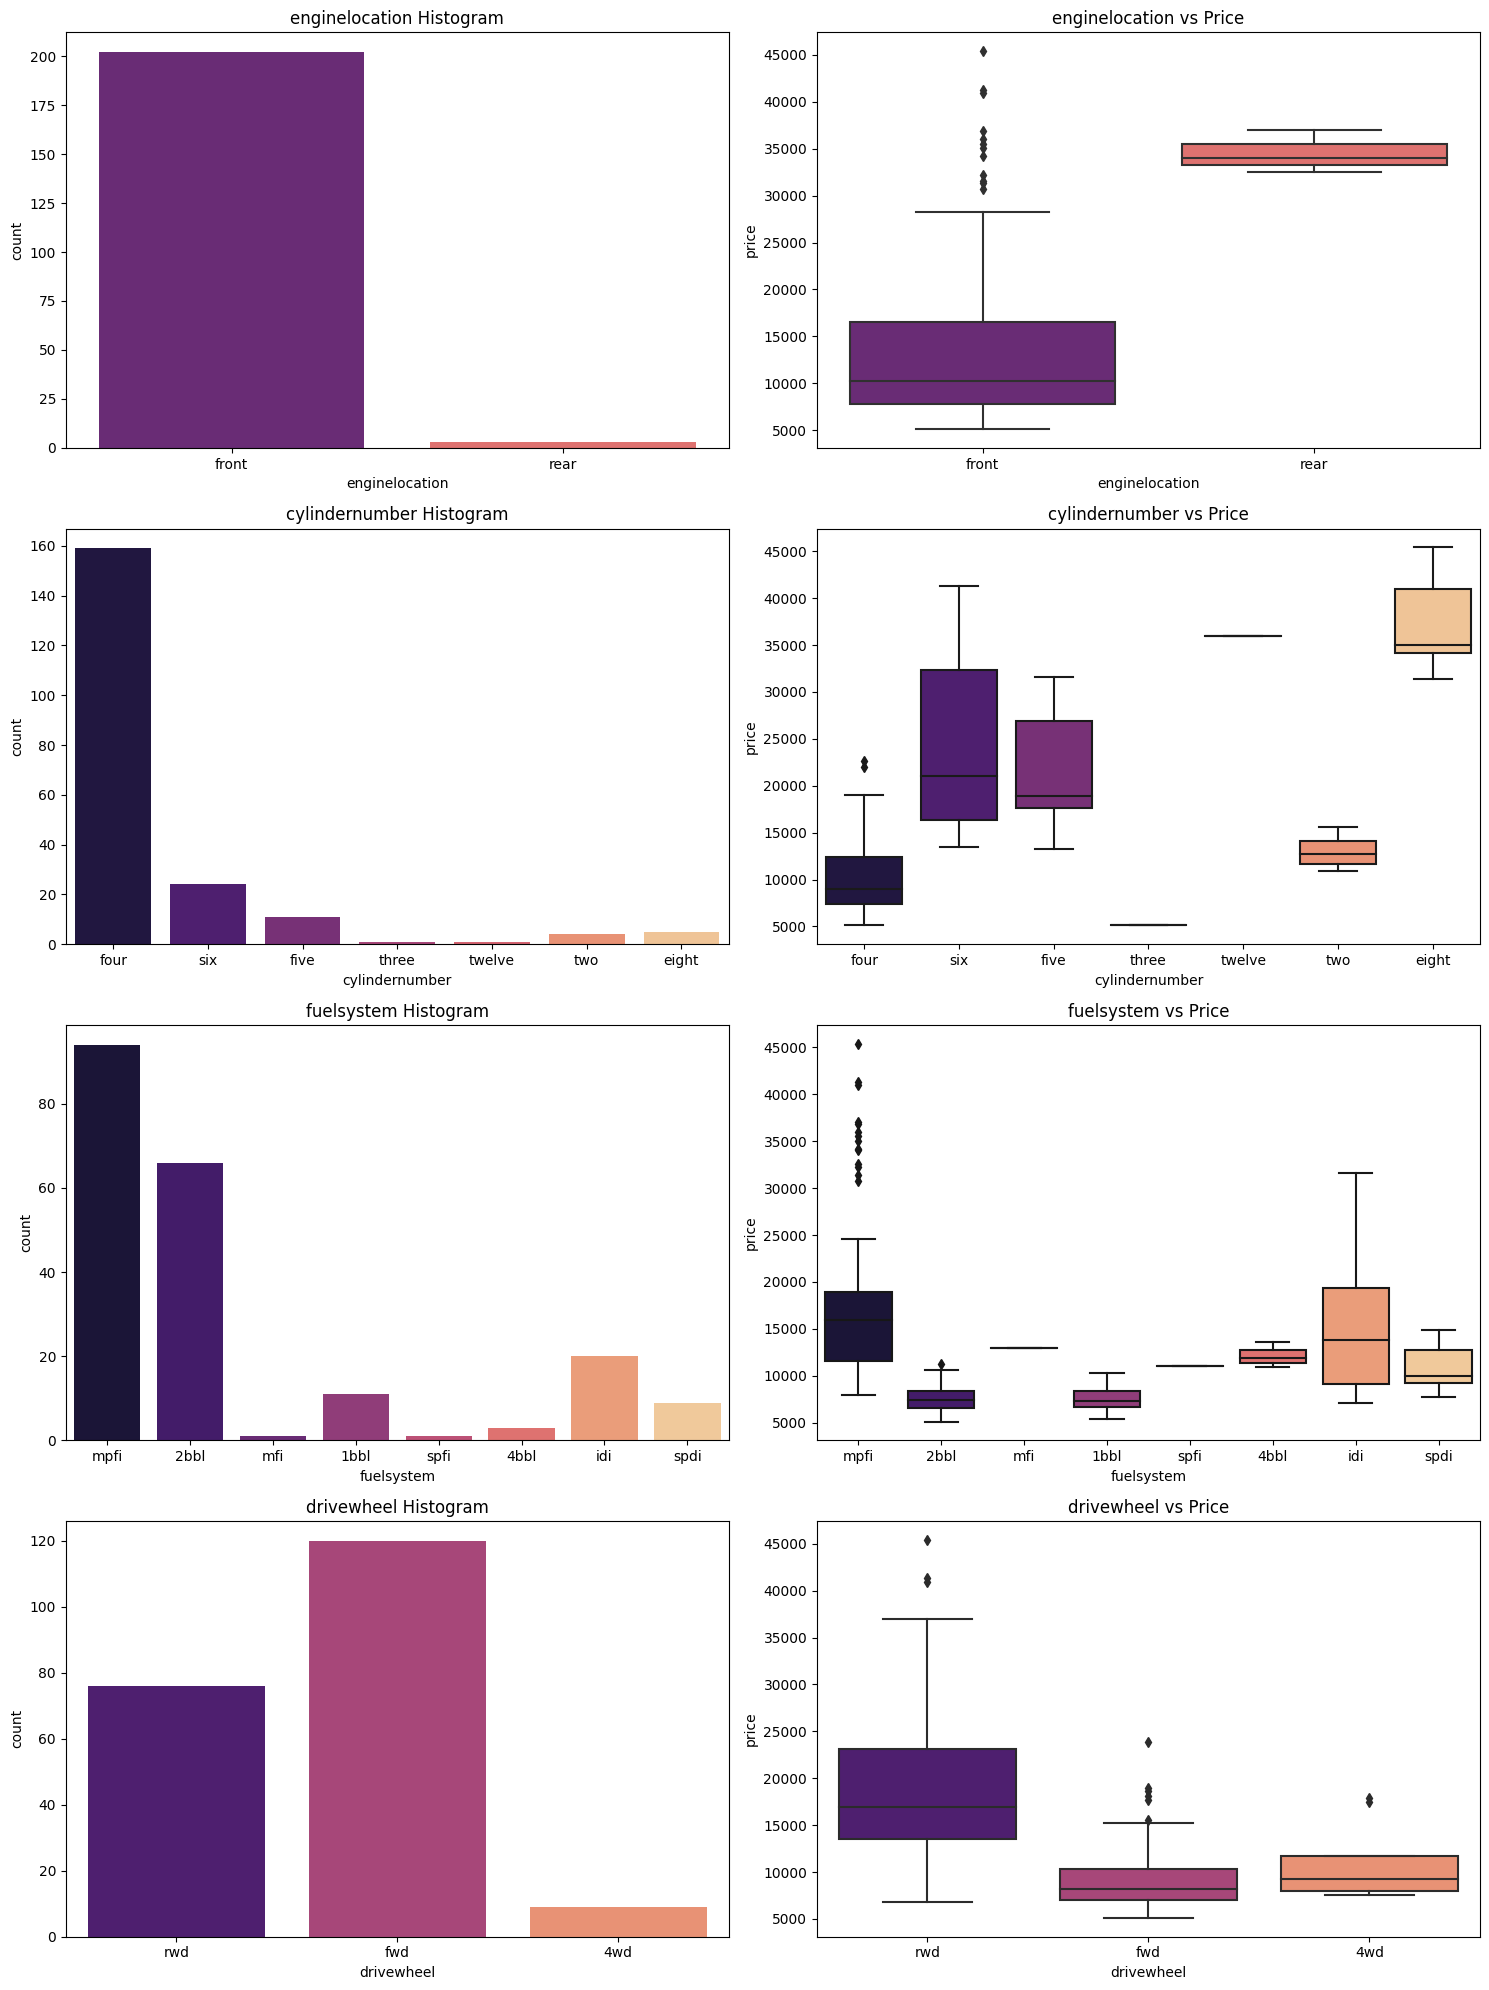

In [20]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))
    
plt.figure(figsize=(15,20))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

1.Very few datapoints for enginelocation categories to make an inference.

2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

3.mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range.

4.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

### Bivarite Analysis

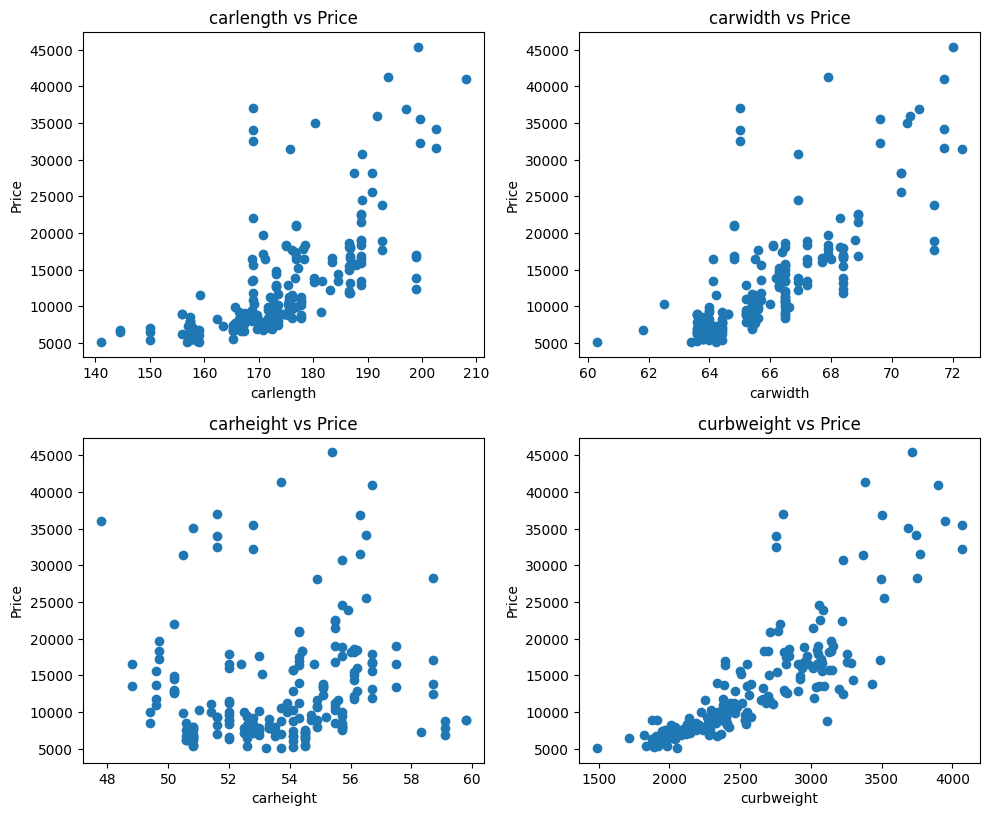

In [21]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

1.carwidth, carlength and curbweight seems to have a poitive correlation with price.

2.carheight doesn't show any significant trend with price.

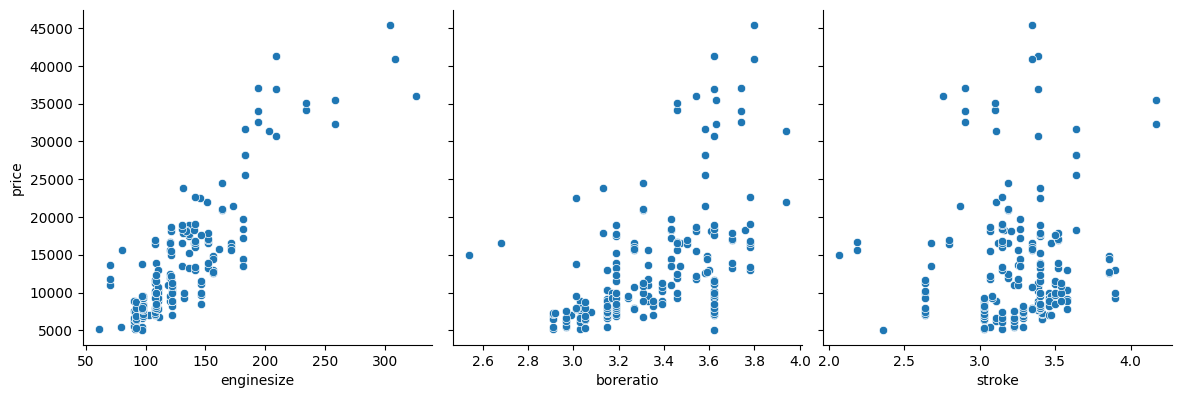

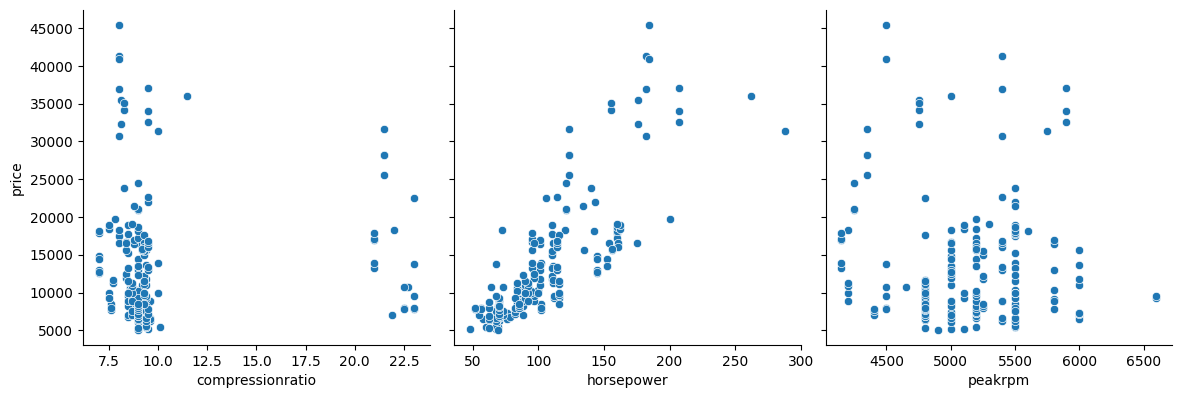

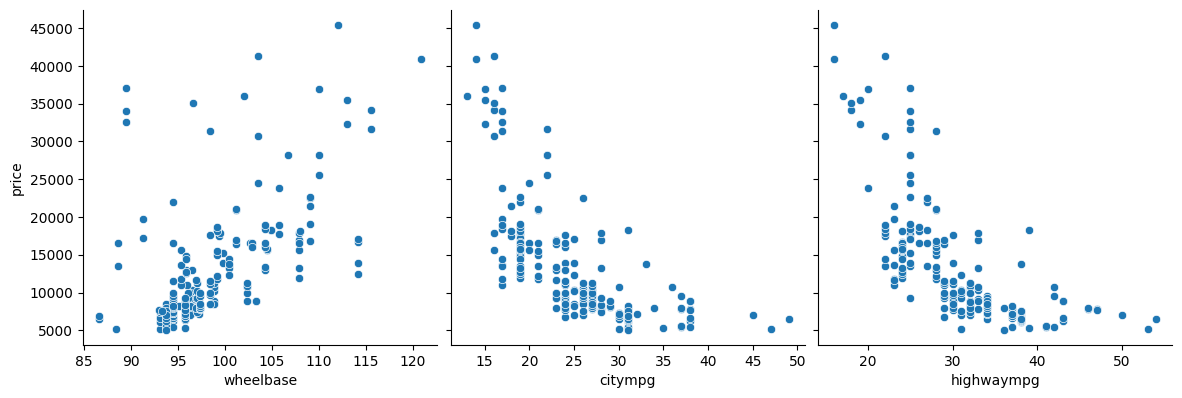

In [22]:
def pp(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pp('enginesize', 'boreratio', 'stroke')
pp('compressionratio', 'horsepower', 'peakrpm')
pp('wheelbase', 'citympg', 'highwaympg')

1.enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

2.citympg, highwaympg - seem to have a significant negative correlation with price.

## Step 4  : Dummy Variables

In [23]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize','boreratio','horsepower', 'carlength','carwidth']]
cars_lr=cars_lr.reset_index(drop=True)

In [24]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr
cars_lr = pd.get_dummies(cars_lr)

In [25]:
cars_lr

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fueltype_diesel,fueltype_gas,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,0,1,...,0,1,0,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,0,1,...,0,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,109.1,2952,141,3.78,114,188.8,68.9,0,1,...,0,0,0,0,0,1,0,0,0,0
201,19045.0,109.1,3049,141,3.78,160,188.8,68.8,0,1,...,0,0,0,0,0,1,0,0,0,0
202,21485.0,109.1,3012,173,3.58,134,188.8,68.9,0,1,...,0,1,0,0,0,0,1,0,0,0
203,22470.0,109.1,3217,145,3.01,106,188.8,68.9,1,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
cars_lr.shape

(205, 34)

# Step 5 : Train-Test Split and feature scaling

In [27]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

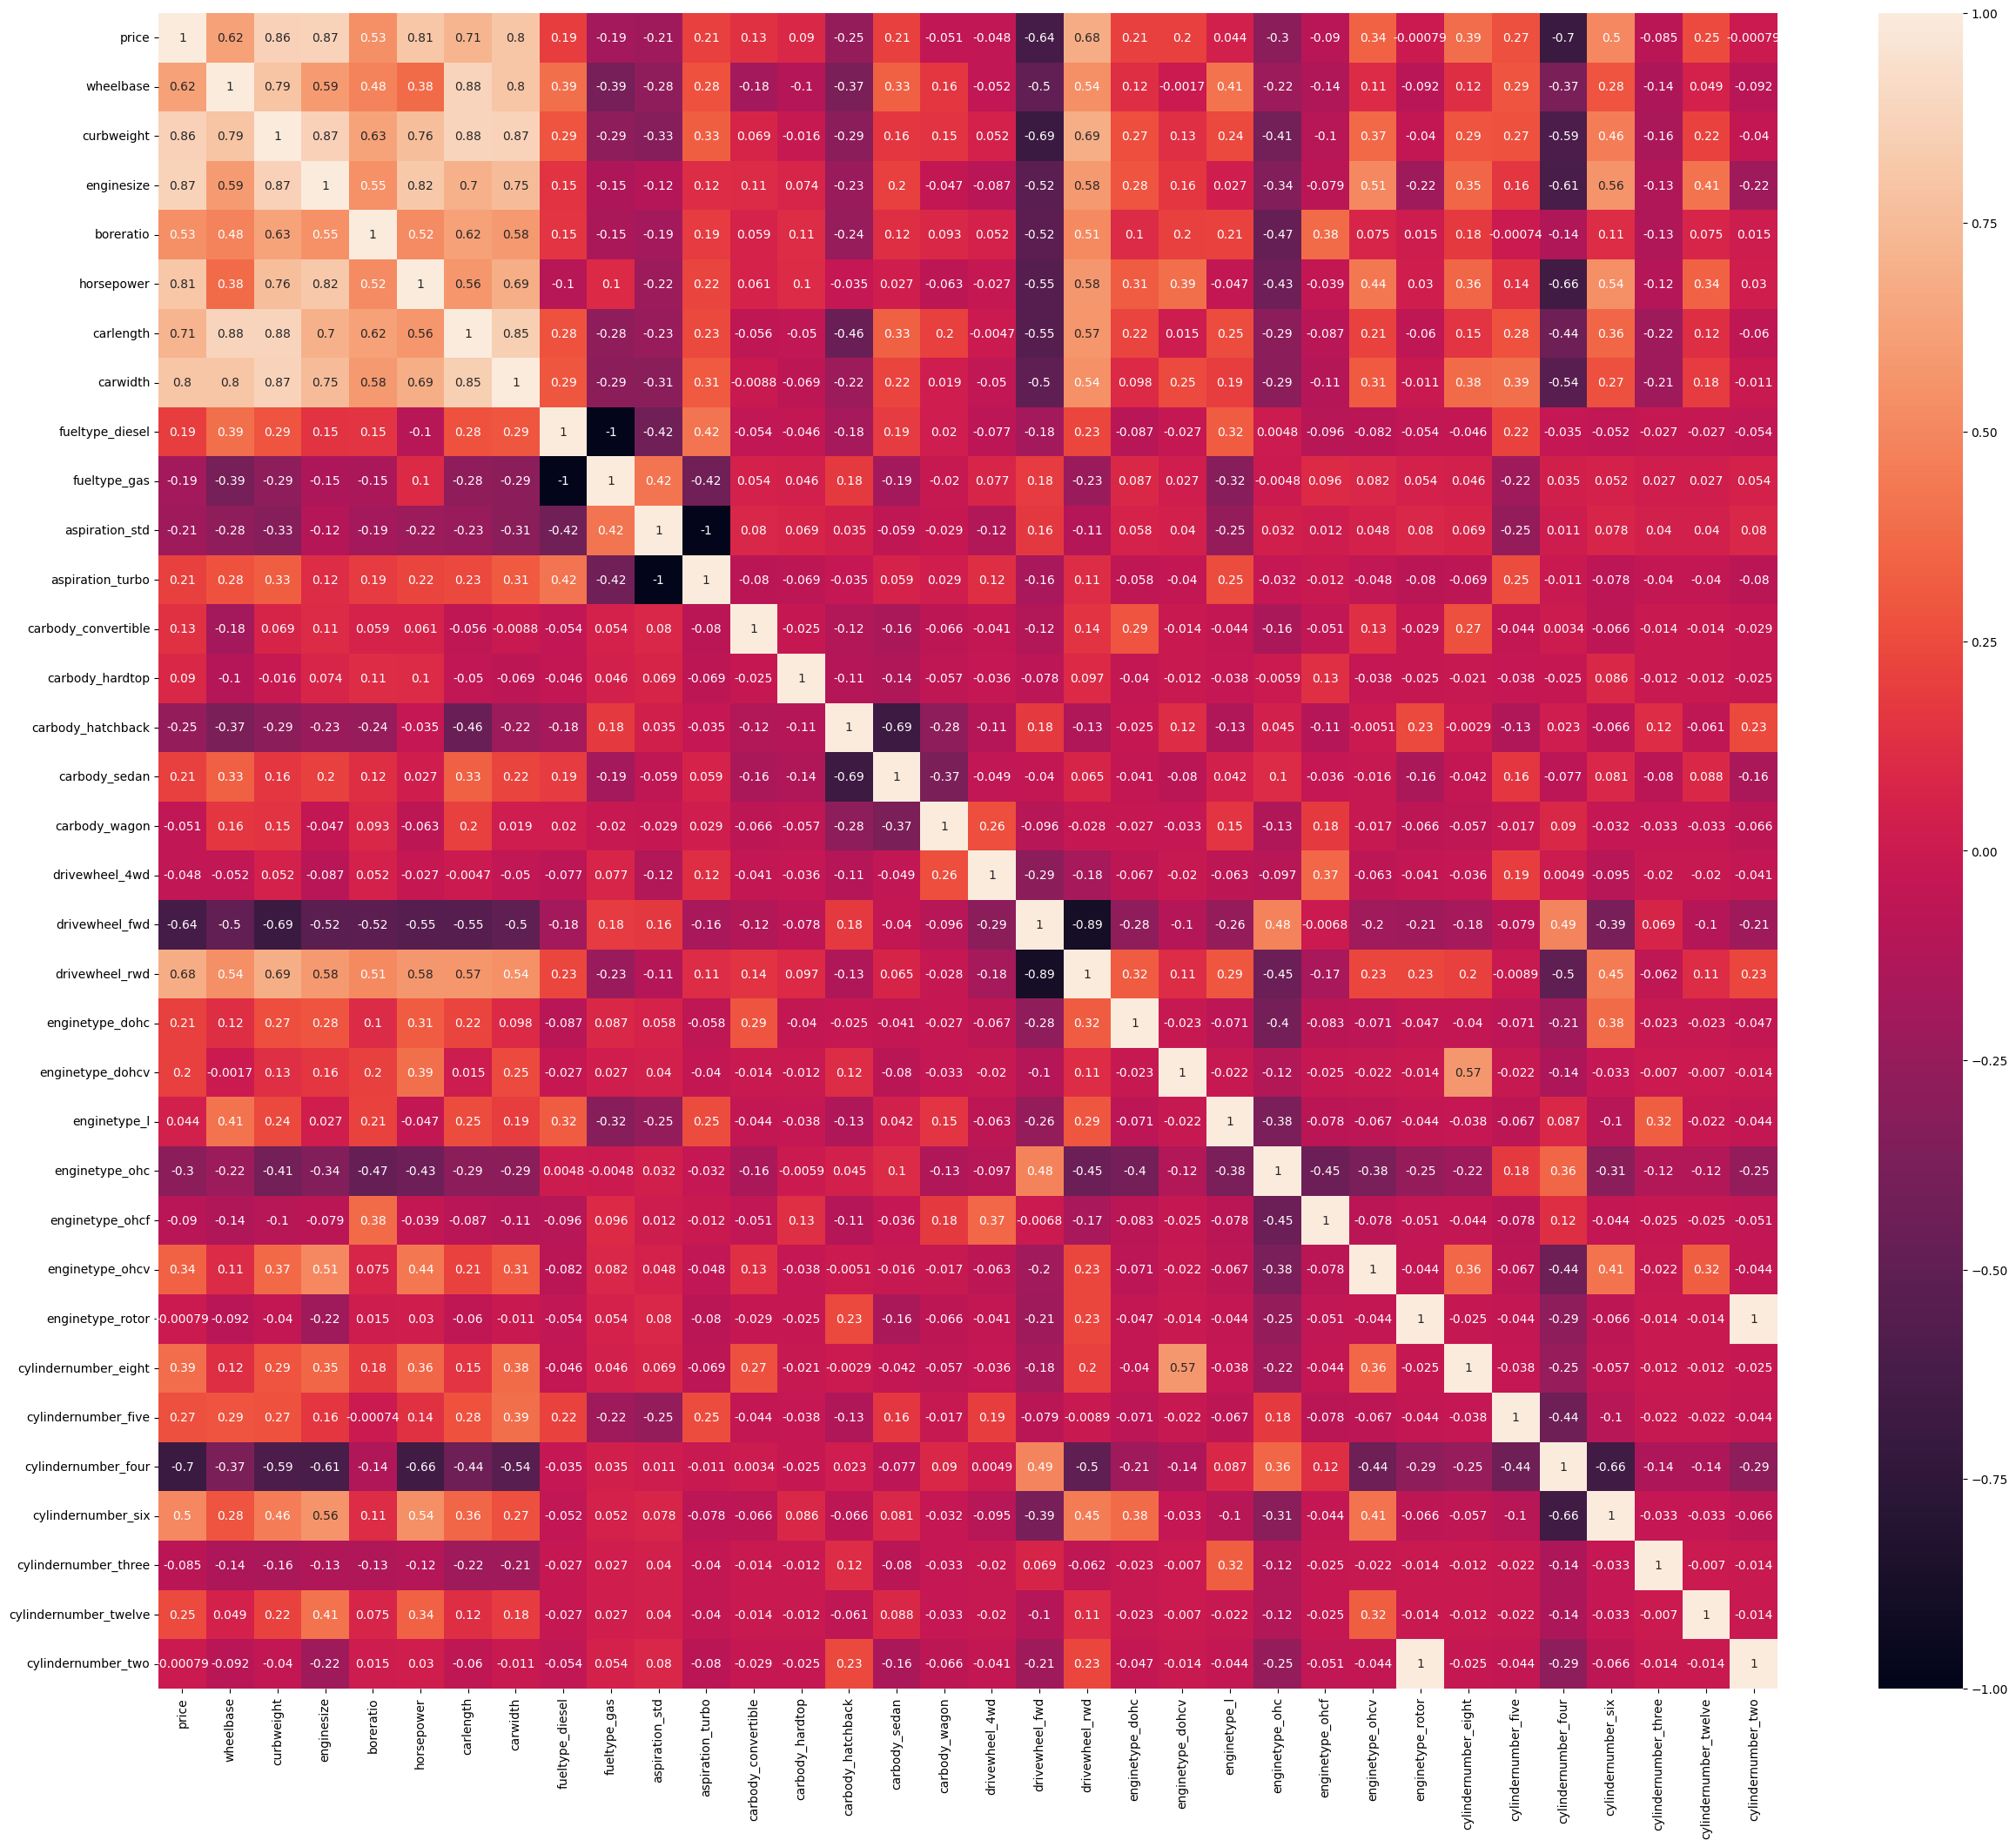

In [29]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Highly correlated variables to price are - curbweight, enginesize, horsepower,carwidth and highend

In [30]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
y_test=df_test.pop('price')
X_train = df_train
X_test=df_test

In [31]:
X_train.shape

(143, 33)

In [32]:
y_train.shape

(143,)

In [33]:
y_test.shape

(62,)

In [34]:
X_test.shape

(62, 33)

# Step 6: Model Building

Building model using statsmodel, for the detailed statistics

In [35]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', False, 3),
 ('enginesize', True, 1),
 ('boreratio', False, 15),
 ('horsepower', True, 1),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('fueltype_diesel', True, 1),
 ('fueltype_gas', False, 7),
 ('aspiration_std', False, 13),
 ('aspiration_turbo', False, 8),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 14),
 ('drivewheel_4wd', False, 12),
 ('drivewheel_fwd', False, 11),
 ('drivewheel_rwd', True, 1),
 ('enginetype_dohc', False, 18),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 10),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 6),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 5),
 

In [38]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 9),
 ('curbweight', False, 3),
 ('enginesize', True, 1),
 ('boreratio', False, 15),
 ('horsepower', True, 1),
 ('carlength', False, 4),
 ('carwidth', True, 1),
 ('fueltype_diesel', True, 1),
 ('fueltype_gas', False, 7),
 ('aspiration_std', False, 13),
 ('aspiration_turbo', False, 8),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchback', False, 2),
 ('carbody_sedan', False, 17),
 ('carbody_wagon', False, 14),
 ('drivewheel_4wd', False, 12),
 ('drivewheel_fwd', False, 11),
 ('drivewheel_rwd', True, 1),
 ('enginetype_dohc', False, 18),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 10),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 6),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', False, 5),
 

In [39]:
X_train.columns[rfe.support_]

Index(['enginesize', 'horsepower', 'carwidth', 'fueltype_diesel',
       'carbody_convertible', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [40]:
X_test.columns[rfe.support_]

Index(['enginesize', 'horsepower', 'carwidth', 'fueltype_diesel',
       'carbody_convertible', 'drivewheel_rwd', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_two'],
      dtype='object')

In [41]:
X_train = X_train[X_train.columns[rfe.support_]]
X_test=X_test[X_test.columns[rfe.support_]]

In [42]:
X_train.shape

(143, 16)

In [43]:
# Fitting the model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model1 = sm.OLS(y_train,X_train)
fii = model1.fit()
fii.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     78.60
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           1.71e-57
Time:                        12:23:43   Log-Likelihood:                -31.585
No. Observations:                 143   AIC:                             97.17
Df Residuals:                     126   BIC:                             147.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2250      0.165     -1.366      0.174      -0.551       0.101
enginesize               0.3074      0.081      3.789      0.000       0.147       0.468
horsepower               0.3394      0.073      4.620      0.000       0.194       0.485
carwidth                 0.2285      0.060      3.824      0.000       0.110       0.347
fueltype_diesel          0.2675      0.122      2.184      0.031       0.025       0.510
carbody_convertible      0.5870      0.194      3.022      0.003       0.203       0.971
drivewheel_rwd           0.3616      0.095      3.804      0.000       0.174       0.550
enginetype_dohcv        -1.6297      0.528     -3.088      0.002      -2.674      -0.585
enginetype_l             0.3032      0.198      1.534      0.128      -0.088       0.694
enginetype_ohc           0.6776      0.137      4.943      0.000       0.406       0.949
enginetype_ohcf          0.6582      0.161      4.085      0.000       0.339       0.977
enginetype_ohcv         -0.4781      0.171     -2.789      0.006      -0.817      -0.139
cylindernumber_eight     1.0043      0.302      3.323      0.001       0.406       1.602
cylindernumber_five     -0.3353      0.186     -1.807      0.073      -0.703       0.032
cylindernumber_four     -0.6045      0.149     -4.057      0.000      -0.899      -0.310
cylindernumber_three     0.4288      0.426      1.007      0.316      -0.414       1.272
cylindernumber_two       0.2087      0.265      0.789      0.432      -0.315       0.732
==============================================================================
Omnibus:                       18.980   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.918
Skew:                           0.503   Prob(JB):                     1.76e-10
Kurtosis:                       5.554   Cond. No.                         36.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step 7: Check Model Assumption 

### 1.We already verifed the linear relationship between the target variable price with the others independent variables.

### 2.Multicolinearity

In [44]:
# Varice Inflation Factor
X=X_train
from statsmodels.stats.outliers_influence import variance_inflation_factor
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns
vif

,VIF,variable
0,37.534329,const
1,9.108180,enginesize
2,7.467292,horsepower
3,4.942385,carwidth
4,1.714309,fueltype_diesel
5,1.419723,carbody_convertible
6,2.842271,drivewheel_rwd
7,2.676269,enginetype_dohcv
8,3.187646,enginetype_l
9,5.605372,enginetype_ohc


We can see that the value of VIF for the all independent variable is less than 10 . Hence we can say that there is no multicolinearity in the data set.

### 3. Normality of residuals.

In [45]:
list(zip(X_test.columns,rfe.support_,rfe.ranking_))

[('enginesize', False, 9),
 ('horsepower', False, 3),
 ('carwidth', True, 1),
 ('fueltype_diesel', False, 15),
 ('carbody_convertible', True, 1),
 ('drivewheel_rwd', False, 4),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 13),
 ('enginetype_ohcv', False, 8),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 16),
 ('cylindernumber_four', False, 2),
 ('cylindernumber_three', False, 17),
 ('cylindernumber_two', False, 14)]

In [46]:
X_test=sm.add_constant(X_test)


In [47]:
ypred = fii.predict(X_test)

In [48]:
residual=ypred -y_test

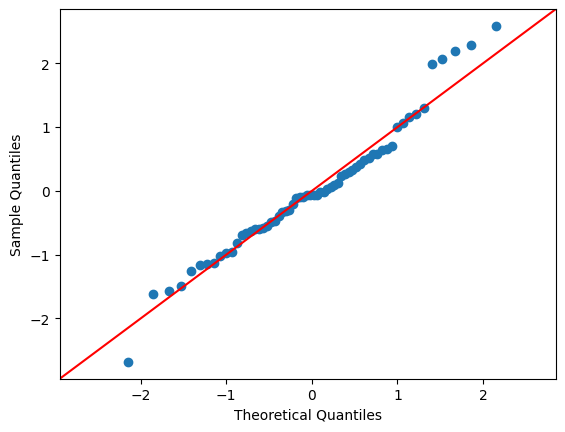

In [49]:
#QQ plot of residuals
import numpy as np
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
sm.qqplot(residual,line='45',fit=True,dist=stats.norm)
py.show()


We can see that most of sample quantiles matches with theretical quantiles , Hence normailty assumption holds for the dataset.

### 4.   Autocorrelation  of  residuals

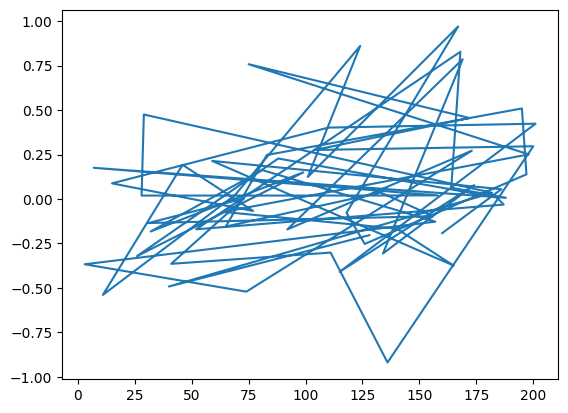

In [50]:
plt.plot(residual)

From the above plot we can see that residuals are randomly distributed ie there is no any particular partten.Hence we can say that the residuals are not correlated.

### 5. Homoscedasticity of residuals.

Text(0.5, 1.0, 'Scatter plot of residuals vs predicted value of y')

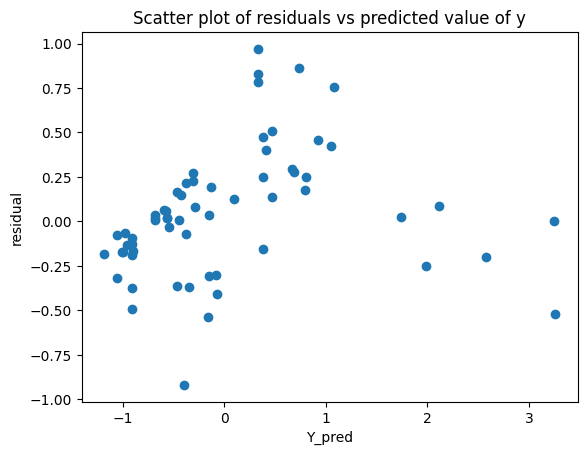

In [51]:
plt.scatter(ypred,residual)
plt.xlabel("Y_pred")
plt.ylabel("residual")
plt.title("Scatter plot of residuals vs predicted value of y")

From the above plot we can see that residuals are randomly distributed against the predicted values and there is no any particular partten in the data points of the scatter plot .Hence we can say that variance of the residuals are constant, so assumption of the homosecdasticity for the linear regression is hold. 

# Step 8: Evaluation of the model using Statistics

In [52]:
df = pd.DataFrame({'ypred':ypred, 'y_test':y_test})
print(df)

        ypred    y_test
160 -0.914345 -0.722601
186 -0.576763 -0.632141
59  -0.376049 -0.590316
165 -0.910185 -0.536184
140 -0.905320 -0.738733
..        ...       ...
28  -0.561647 -0.581235
29   0.377317 -0.098104
182 -0.683484 -0.718179
40  -0.909018 -0.417044
128  2.574229  2.777497

[62 rows x 2 columns]


In [53]:
model2=sm.OLS(y_test,X_test).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     68.96
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           1.81e-26
Time:                        12:23:44   Log-Likelihood:                 4.3891
No. Observations:                  62   AIC:                             19.22
Df Residuals:                      48   BIC:                             49.00
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.1858      0.357      3.320      0.002       0.468       1.904
enginesize              -0.1327      0.133     -0.999      0.323      -0.400       0.134
horsepower               0.3972      0.098      4.037      0.000       0.199       0.595
carwidth                 0.1937      0.079      2.459      0.018       0.035       0.352
fueltype_diesel          0.2088      0.125      1.665      0.102      -0.043       0.461
carbody_convertible      0.5832      0.208      2.798      0.007       0.164       1.002
drivewheel_rwd           0.1829      0.092      1.996      0.052      -0.001       0.367
enginetype_dohcv     -2.192e-15   6.51e-16     -3.366      0.002    -3.5e-15   -8.82e-16
enginetype_l             0.2017      0.314      0.643      0.523      -0.429       0.832
enginetype_ohc           0.0543      0.219      0.248      0.805      -0.387       0.495
enginetype_ohcf          0.1360      0.287      0.474      0.638      -0.441       0.713
enginetype_ohcv         -1.5412      0.381     -4.050      0.000      -2.306      -0.776
cylindernumber_eight     2.8786      0.432      6.656      0.000       2.009       3.748
cylindernumber_five     -0.7426      0.387     -1.920      0.061      -1.520       0.035
cylindernumber_four     -1.5611      0.272     -5.746      0.000      -2.107      -1.015
cylindernumber_three          0          0        nan        nan           0           0
cylindernumber_two            0          0        nan        nan           0           0
==============================================================================
Omnibus:                        3.892   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.143   Jarque-Bera (JB):                2.948
Skew:                           0.469   Prob(JB):                        0.229
Kurtosis:                       3.511   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

1.R-sqaured and Adjusted R-squared (extent of fit) are  0.949 and 0.935 , Hence 94% variance explained.

2.F-stats and Prob(F-stats) (overall model fit) - 68.96 and 1.81e-26(approx. 0.0) . Hence Model  is significant and explained 94% variance is just not by chance.

3.p-values for all the coefficients seem to be less than the significance level of 0.05. Hence  meaning that all the predictors are statistically significant.

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ypred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.1304816774671079
Root Mean Squared Error: 0.36122247641461613
